In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


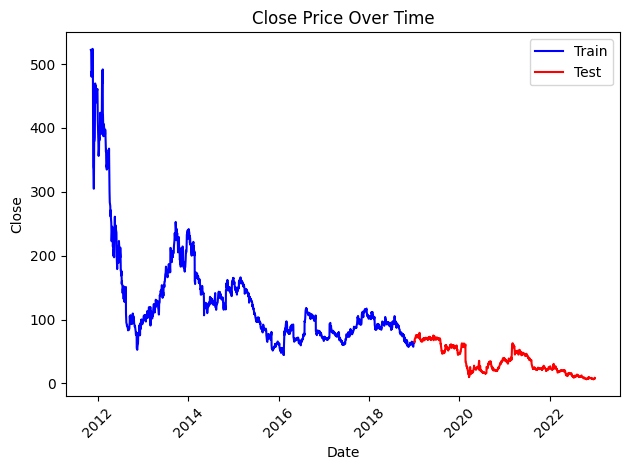

In [3]:
#AAPL
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('GRPN',start_date,end_date,2019)
data.data_preprocess()

In [7]:

ga = IslandGGA(data=data.train_data,K=4,num_islands=8,m_iter=10,num_iter=50,pSize=120,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="ring")
ga.evolve()

Running ring
GENERATION 0 START
Generation 0: Best fitness = 1.5018866608028736 Average Fitness = 1.0397664057210882
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 1.5018866608028736 Average Fitness = 1.0866851201211845
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 1.5816454021799098 Average Fitness = 1.1453411958070312
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 1.5816454021799098 Average Fitness = 1.189603768192248
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 1.5816454021799098 Average Fitness = 1.2223759822545974
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 1.5816454021799098 Average Fitness = 1.258519980136142
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 1.725801080365759 Average Fitness = 1.2698691830673576
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 1.725801080365759 Average Fitness = 1.2788077971524991
GENERATION 7 END
GENERATION 8 START
Gene

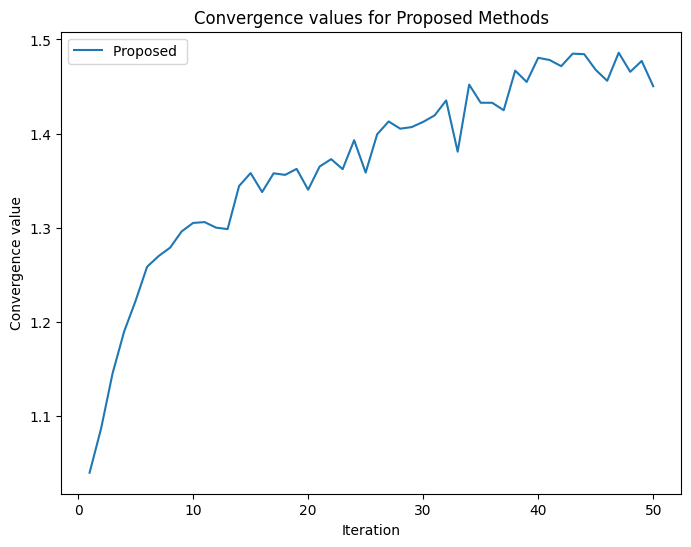

In [8]:
# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))

plt.plot(np.arange(1, 51), ga.convergence_values, label='Proposed ')
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()

In [10]:
asset_prices = data.train_data.copy()
# Set the 'Date' column as the index of the DataFrame if it's not already
asset_prices.set_index('Date', inplace=True)

# Resample the asset prices to monthly frequency and select the first and last values of each month
monthly_prices = asset_prices.resample('M').agg({'close': ['first', 'last']})

# Calculate the monthly returns as the percentage change in price
monthly_returns = monthly_prices['close', 'last'].pct_change()

# Calculate the cumulative returns
cumulative_returns = (1 + monthly_returns).cumprod()

# Calculate the profit as the difference between the final cumulative return and 1 (initial investment)
profit = cumulative_returns.iloc[-1]-1

print("Profit for the Buy-and-Hold Strategy:")
print(profit)
print("Profit for the gtspo Strategy:")
print(ga.globalBest.profit)
# Plot the monthly returns
#monthly_returns.plot(figsize=(10, 6))
print(ga.globalBest)

Profit for the Buy-and-Hold Strategy:
-0.8171428571428571
Profit for the gtspo Strategy:
0.564811255570566
SLTP: [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]
GROUP: [['TS1', 'TS5', 'TS4'], ['TS6', 'TS12'], ['TS10', 'TS3', 'TS11'], ['TS8', 'TS2', 'TS7', 'TS9']]
WEIGHT: [1, 0, 1, 0, 1, 1, 1, 1, 1]
FITNESS: 1.8978932351617495


In [13]:

def max_drawdown(returns):
  """
  Calculates the maximum drawdown from monthly returns.

  Args:
    returns: A pandas DataFrame of monthly returns.

  Returns:
    The maximum drawdown.
  """

  # Calculate the cumulative returns.
  cumulative_returns = (1 + returns).cumprod()

  # Find the minimum value of the cumulative returns.
  min_return = cumulative_returns.min()

  # Calculate the maximum drawdown.
  max_drawdown = (1 - min_return) 

  return max_drawdown

if __name__ == "__main__":
  # Load the monthly returns data.
  asset_prices = data.train_data.copy()
  # Set the 'Date' column as the index of the DataFrame if it's not already
  asset_prices.set_index('Date', inplace=True)

  # Resample the asset prices to monthly frequency and select the first and last values of each month
  monthly_prices = asset_prices.resample('M').agg({'close': ['first', 'last']})

  # Calculate the monthly returns as the percentage change in price
  monthly_returns = monthly_prices['close', 'last'].pct_change()

  # Calculate the maximum drawdown.
  max_drawdown = max_drawdown(monthly_returns)

  # Print the maximum drawdown.
  print(f"The maximum drawdown is {max_drawdown:.2f}.")
  print("Profit for the gtspo Strategy:")
print(ga.globalBest.mdd)


The maximum drawdown is 0.84.
Profit for the gtspo Strategy:
0.3628237436629037


IndexError: list index out of range